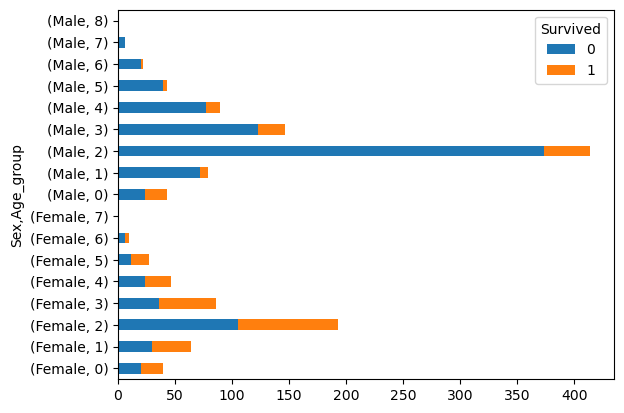

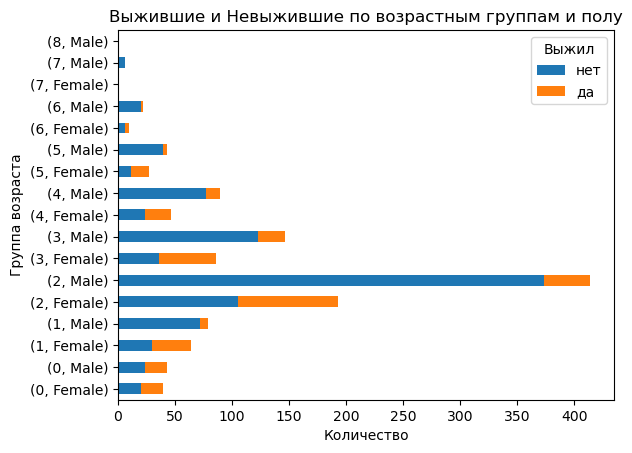

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_and_test2.csv", usecols = ('Age', 'Sex', '2urvived'))
#df.describe()
df.rename(columns = {'2urvived': 'Survived'}, inplace=True)
df['Age_group'] = df['Age']
#df['Age_group'].fillna(-1) # fill empty filds by -1
#df[ df['Age_group'] > 50 ]
#df[ df['Age_group'].isna() ]

df.Sex = df.Sex.map(lambda sex: 'Male' if 0 == sex else 'Female')

df['Age_group'] = df.Age_group.map(lambda age: int(age//10))

survived = df.groupby(['Sex', 'Age_group', 'Survived'])
survived.size().unstack().plot(kind='barh', stacked=True)

survived = df.groupby(['Age_group', 'Sex', 'Survived'])
survived.size().unstack().plot(kind='barh', stacked=True)

# Настройки графика
plt.title('Выжившие и Невыжившие по возрастным группам и полу')
plt.ylabel('Группа возраста')
plt.xlabel('Количество')

plt.legend(title='Выжил', labels=['нет', 'да'])

# Отображаем график
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("train_and_test2.csv", usecols = ('Age', '2urvived'))
df.rename(columns = {'2urvived': 'Survived'}, inplace=True)
df['Age_group'] = df['Age']
df['Age_group'] = df.Age_group.map(lambda age: int(age//10))

survived = df[df['Survived'] == 1]

s_grouped = survived.groupby(['Age_group']).size()
#print(s_grouped)

s_max =s_grouped.max()

max_qty=s_grouped[s_grouped==s_max]

print(f'group with max survived people: {max_qty.index[0]}')

s_grouped

group with max survived people: 2


Age_group
0     38
1     41
2    129
3     73
4     34
5     20
6      6
8      1
dtype: int64

In [204]:
import pandas as pd

df2 = pd.read_csv("train_and_test2.csv", usecols = ('Age', '2urvived'))
df2.rename(columns = {'2urvived': 'Survived'}, inplace=True)
df2['Age_group'] = df2['Age']
df2['Age_group'] = df2.Age_group.map(lambda age: int(age//10))

s_grouped = df2.groupby(['Age_group', 'Survived']).size()

s_groupedDF = s_grouped.reset_index()

serv_pcnt = []    
i = 0
while i < len(s_groupedDF.Age_group.unique()):
    survived = 0
    died = 0
    result = 0
    
    try:
        survived = s_grouped[i][1]
    except Exception as e:
        survived = 0
       
    try:
        died = s_grouped[i][0]
        
    except Exception as e:
        died = 0
    if died != 0 or survived != 0:
        result = 100 if died == 0 else 0 if survived == 0 else round(survived/died * 100, 2)
        print(f"group: {i} - {result}%")
        serv_pcnt.append(result)
        
    i += 1
      
index_of_max = serv_pcnt.index(max(serv_pcnt))
print("================================================")
print(f"group with the max percentage of survivors - {index_of_max}")
print("================================================")

group: 0 - 86.36%
group: 1 - 40.2%
group: 2 - 26.99%
group: 3 - 45.91%
group: 4 - 33.66%
group: 5 - 40.0%
group: 6 - 23.08%
group: 7 - 0%
group: 8 - 100%
group with the max percentage of survivors - 8


In [126]:
import pandas as pd

df2 = pd.read_csv("train_and_test2.csv", usecols = ('Age', '2urvived'))
df2.rename(columns = {'2urvived': 'Survived'}, inplace=True)
df2['Age_group'] = df2['Age']
df2['Age_group'] = df2.Age_group.map(lambda age: int(age//10))

newDf = df2.groupby(['Age_group', 'Survived']).size().reset_index()
newDf.rename(columns={0: "qty"}, inplace=True)
#print(newDf)

print("=======================================")

def pcnt2(df):
    try:
        survived = df["qty"][df.Survived == 1].iloc[0]
    except Exception as e:
        survived = 0
       
    try:
        died = df["qty"][df.Survived == 0].iloc[0]
    except Exception as e:
        died = 0
                   
    if survived == 0:
        return 0
    if died == 0:
        return 100
    else:
       return (survived / died * 100) 

res = newDf.groupby(['Age_group']).apply(pcnt2)
print(res)
print("================================================")
print(f"group with the max percentage of survivors - {res.idxmax()}")
print("================================================")

Age_group
0     86.363636
1     40.196078
2     26.987448
3     45.911950
4     33.663366
5     40.000000
6     23.076923
7      0.000000
8    100.000000
dtype: float64
group with the max percentage of survivors - 8


In [130]:
import pandas as pd

df2 = pd.read_csv("train_and_test2.csv", usecols = ('Age', '2urvived'))
df2.rename(columns = {'2urvived': 'Survived'}, inplace=True)
df2['Age_group'] = df2['Age']
df2['Age_group'] = df2.Age_group.map(lambda age: int(age//10))

newDf = df2.groupby(['Age_group', 'Survived']).size().reset_index()
newDf.rename(columns={0: "qty"}, inplace=True)
print(newDf)

print("=======================================")

newDf = newDf.iloc[:14] # remove 7 and 8 groups with not valide data
res = newDf.groupby(['Age_group']).apply(lambda df: df["qty"].iloc[1]/df["qty"].iloc[0]*100)
print(res)
print("================================================")
print(f"group with the max percentage of survivors - {res.idxmax()}")
print("================================================")

    Age_group  Survived  qty
0           0         0   44
1           0         1   38
2           1         0  102
3           1         1   41
4           2         0  478
5           2         1  129
6           3         0  159
7           3         1   73
8           4         0  101
9           4         1   34
10          5         0   50
11          5         1   20
12          6         0   26
13          6         1    6
14          7         0    7
15          8         1    1
Age_group
0    86.363636
1    40.196078
2    26.987448
3    45.911950
4    33.663366
5    40.000000
6    23.076923
dtype: float64
group with the max percentage of survivors - 0
